In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mlgrad.regr as regr
import mlgrad.models as models
import mlgrad.inventory as inventory

In [3]:
df = pd.read_csv("data/mammals.csv", sep=",")
df

,id,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [4]:
body = df.body.values
brain = df.brain.values

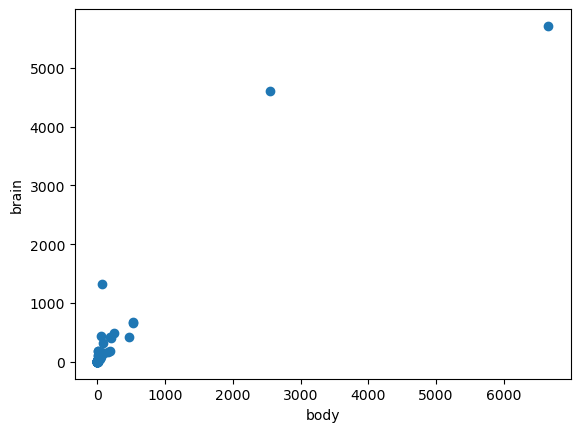

In [5]:
plt.scatter(body, brain)
plt.xlabel("body")
plt.ylabel("brain")
plt.show()

In [6]:
X = np.log(body)
Y = np.log(brain)

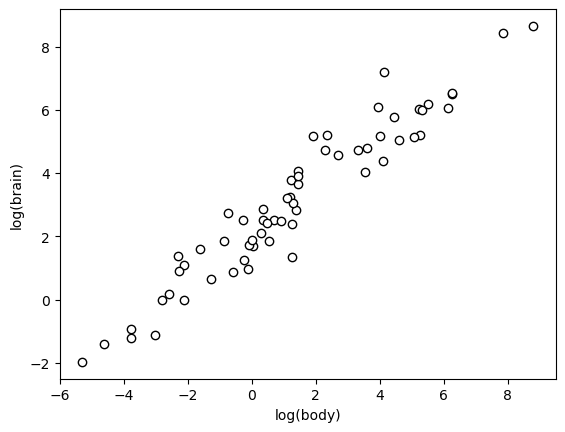

In [7]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.xlabel("log(body)")
plt.ylabel("log(brain)")
plt.show()

In [8]:
linmod1 = models.LinearModel(1)
alg1 = regr.regression(X[:,None], Y, linmod1, h=0.1)

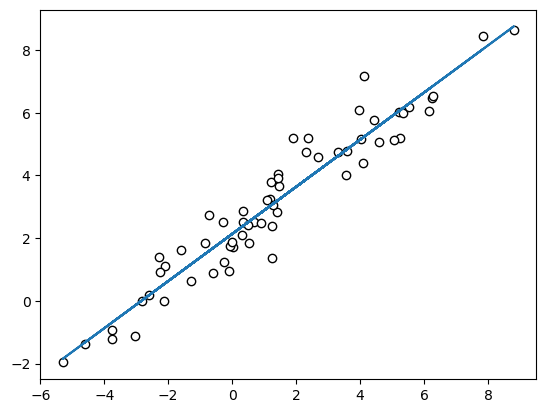

In [9]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod1.evaluate(X[:,None]))
plt.show()

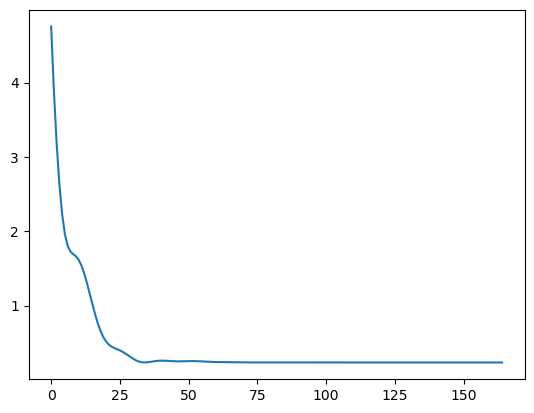

In [10]:
plt.plot(alg1.lvals)
plt.show()

In [11]:
E = abs(linmod1.evaluate(X[:,None]) - Y)

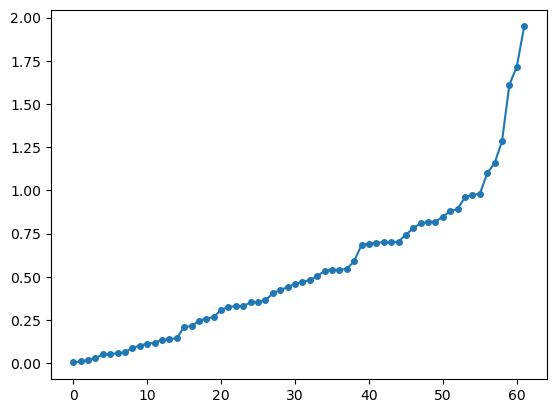

In [12]:
plt.plot(sorted(E), marker='o', markersize=4)
plt.show()

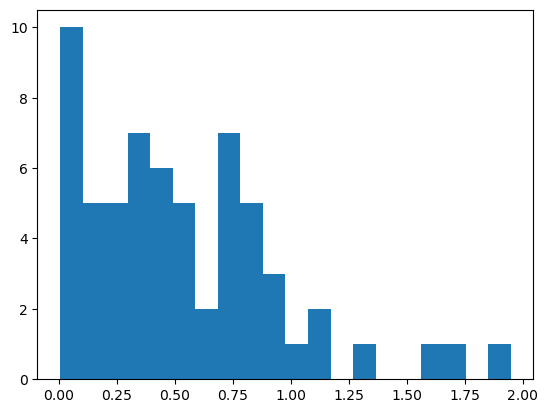

In [13]:
plt.hist(E, bins=20)
plt.show()

In [14]:
Z = inventory.zscore(E)

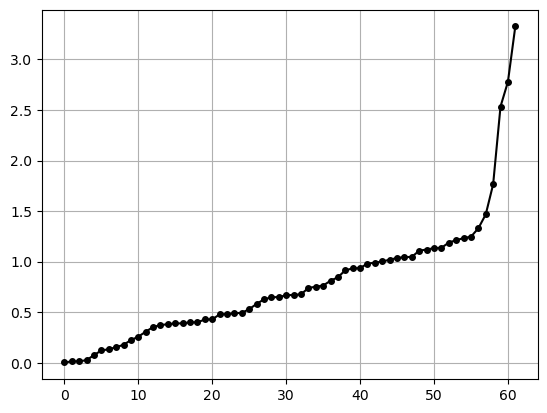

In [15]:
plt.plot(sorted(abs(Z)), marker='o', markersize=4, color='k')
plt.grid(1)
plt.show()

In [16]:
Zm = inventory.modified_zscore(E)

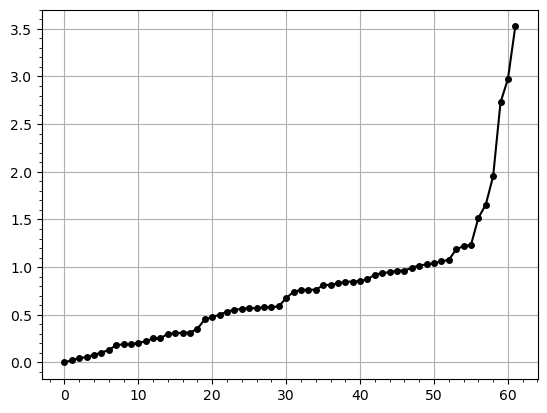

In [17]:
plt.plot(sorted(abs(Zm)), marker='o', markersize=4, color='k')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [18]:
X1 = X[Zm < 3.5]
Y1 = Y[Zm < 3.5]

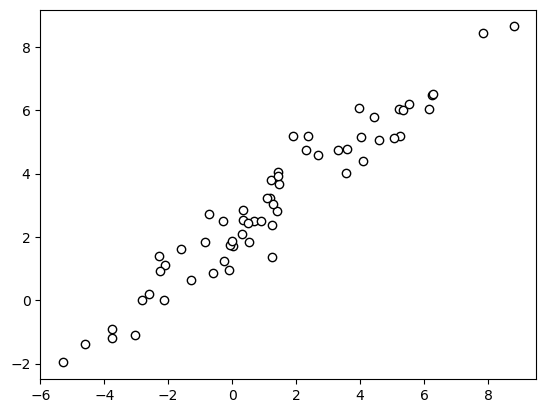

In [19]:
plt.scatter(X1, Y1, c="w", edgecolors="k")
plt.show()

In [20]:
linmod2 = models.LinearModel(1)
alg2 = regr.regression(X1[:,None], Y1, linmod2, h=0.1)

In [21]:
E2 = abs(linmod2.evaluate(X1[:,None]) - Y1)
Zm2 = inventory.modified_zscore(E2)
Z2 = inventory.zscore(E2)

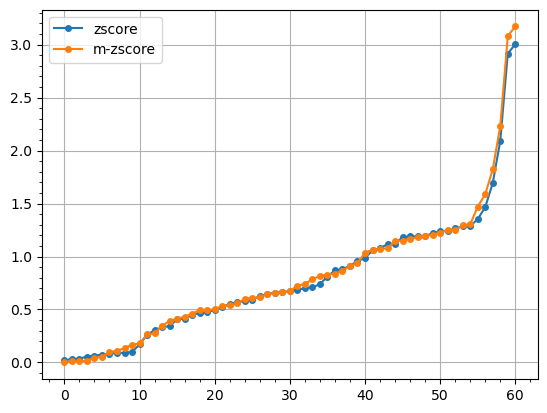

In [22]:
plt.plot(sorted(abs(Z2)), marker='o', markersize=4, label='zscore')
plt.plot(sorted(abs(Zm2)), marker='o', markersize=4, label='m-zscore')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

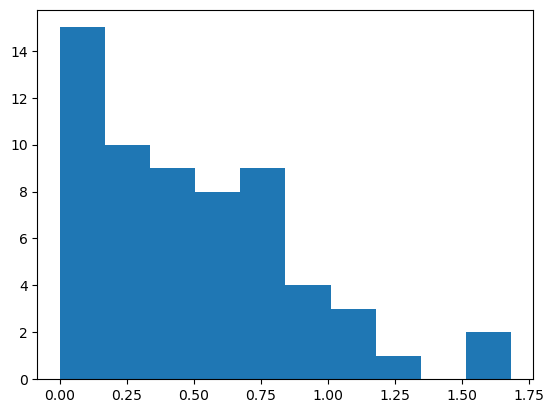

In [23]:
plt.hist(E2, bins=10)
plt.show()

In [24]:
X2 = X1[Z2 < 3]
Y2 = Y1[Z2 < 3]

In [25]:
linmod3 = models.LinearModel(1)
alg3 = regr.regression(X2[:,None], Y2, linmod3, h=0.1)

In [26]:
E3 = abs(linmod3.evaluate(X2[:,None]) - Y2)
Zm3 = inventory.modified_zscore(E3)
Z3 = inventory.zscore(E3)

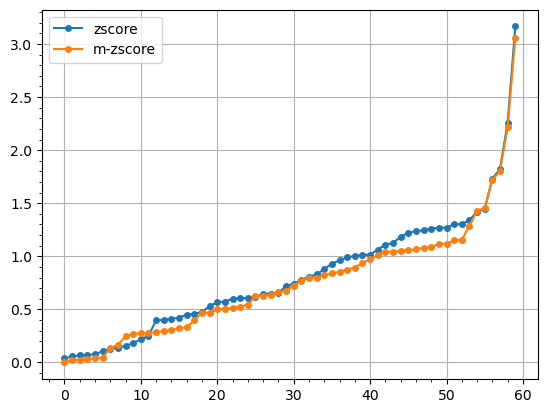

In [27]:
plt.plot(sorted(abs(Z3)), marker='o', markersize=4, label='zscore')
plt.plot(sorted(abs(Zm3)), marker='o', markersize=4, label='m-zscore')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

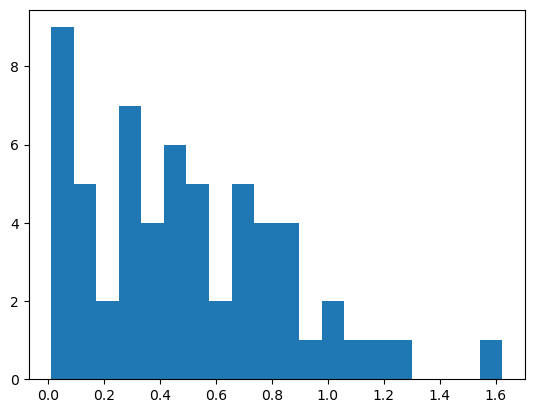

In [28]:
plt.hist(E3, bins=20)
plt.show()

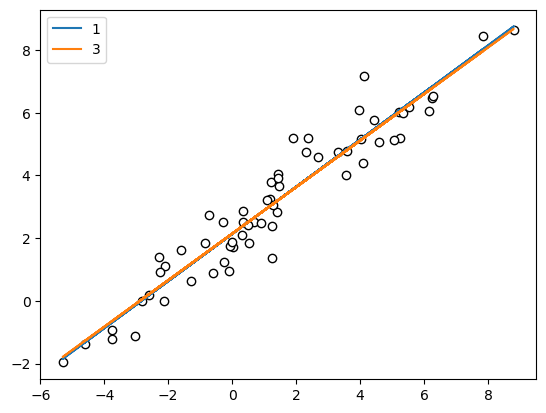

In [29]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod1.evaluate(X[:,None]), label="1")
plt.plot(X, linmod3.evaluate(X[:,None]), label="3")
plt.legend()
plt.show()

In [30]:
Zm1 = inventory.modified_zscore(abs(linmod1.evaluate(X[:,None]) - Y))
Zm3 = inventory.modified_zscore(abs(linmod3.evaluate(X[:,None]) - Y))

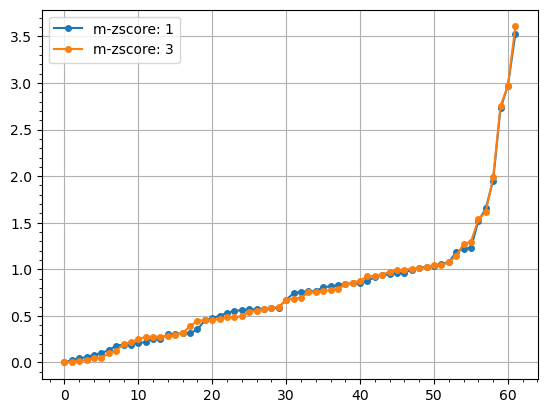

In [31]:
plt.plot(sorted(abs(Zm1)), marker='o', markersize=4, label='m-zscore: 1')
plt.plot(sorted(abs(Zm3)), marker='o', markersize=4, label='m-zscore: 3')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

In [32]:
print(np.asarray(linmod3.param))

[2.143 0.742]


In [33]:
models.as_array1d([1,2,3])

array([1., 2., 3.])

In [34]:
models.as_array1d(1)

array([1.])

In [35]:
models.as_array2d([1,2,3])

array([[1.],
       [2.],
       [3.]])

In [36]:
models.as_array2d([1])

array([[1.]])